# Read Granules

In [1]:
import starepandas
import matplotlib.pyplot as plt
import numpy
import pandas
import geopandas
import pystare
import gc

## Manually reading 

In [2]:
vnp03_name = '../tests/data/granules/viirs/VNP03DNB.A2022308.1930.002.2022309041547.nc'
vnp03 = starepandas.io.granules.VNP03DNB(vnp03_name)
vnp03.read_latlon()
vnp03.read_data()
vnp03 = vnp03.to_df(xy=True)

# VNP03

In [3]:
file_path = '../tests/data/granules/viirs/VNP09.A2022308.1930.001.2022309070407.hdf'
vnp09 = starepandas.io.granules.viirsl2.VNP09(file_path, nom_res='750m')
vnp09.read_data()
vnp09.read_timestamps()

In [4]:
vnp03_path = vnp09.guess_companion_path(prefix='VNP03MOD')
vnp03 = starepandas.io.granules.VNP03MOD(vnp03_path)
vnp03.read_data()
vnp03.read_sidecar_index()
vnp03.read_sidecar_latlon()

In [5]:
vnp09 = vnp09.to_df(xy=True)
vnp03 = vnp03.to_df()
vnp09 = vnp09.join(vnp03)
vnp09.dropna(inplace=True)

In [6]:
#qf1 = starepandas.io.granules.viirsl2.decode_qf1(vnp09['QF1 Surface Reflectance'])
#qf2 = starepandas.io.granules.viirsl2.decode_qf2(vnp09['QF2 Surface Reflectance'])
#vnp09 = vnp09.join(qf1).join(qf2)

<Axes: xlabel='x', ylabel='sensor_zenith'>

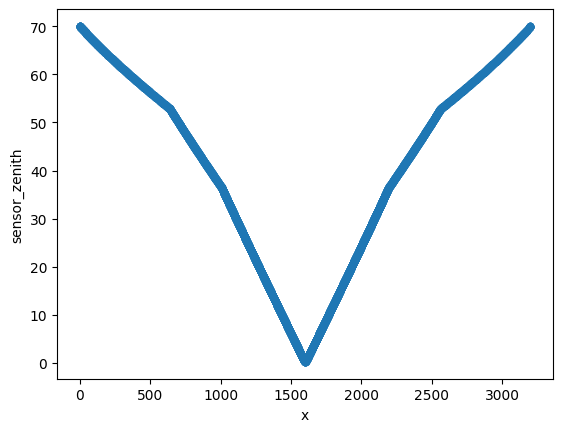

In [8]:
pandas.DataFrame(vnp09[0:10000]).plot(x='x', y='sensor_zenith', kind='scatter')

In [9]:
vnp09.info(memory_usage='deep')

<class 'starepandas.staredataframe.STAREDataFrame'>
Index: 8993654 entries, 1008 to 10341391
Data columns (total 24 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   ts_start                           datetime64[ns]
 1   ts_end                             datetime64[ns]
 2   x                                  uint16        
 3   y                                  uint16        
 4   750m Surface Reflectance Band M1   float64       
 5   750m Surface Reflectance Band M2   float64       
 6   750m Surface Reflectance Band M3   float64       
 7   750m Surface Reflectance Band M4   float64       
 8   750m Surface Reflectance Band M5   float64       
 9   750m Surface Reflectance Band M7   float64       
 10  750m Surface Reflectance Band M8   float64       
 11  750m Surface Reflectance Band M10  float64       
 12  750m Surface Reflectance Band M11  float64       
 13  QF1 Surface Reflectance            UInt8    

In [10]:
del vnp03, vnp09
gc.collect()

117

## MOD09GA

In [11]:
file_name = '../tests/data/granules/MOD09GA.A2020009.h00v08.006.2020011025435.hdf'

In [12]:
mod09ga = starepandas.read_granule(file_name, xy=True)
mod09ga

,x,y,sur_refl_b01_1,sur_refl_b02_1,sur_refl_b03_1,sur_refl_b04_1,sur_refl_b05_1,sur_refl_b06_1,sur_refl_b07_1,QC_500m_1,obscov_500m_1
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
4,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5759995,2395,2399,0.2020,0.1939,0.2187,0.2053,0.1872,0.1359,0.0817,1073741824,0.15
5759996,2396,2399,0.2122,0.2043,0.2320,0.2174,0.2015,0.1356,0.0900,1073741824,0.19
5759997,2397,2399,0.2122,0.2043,0.2320,0.2174,0.2015,0.1356,0.0900,1073741824,0.19
5759998,2398,2399,0.2174,0.2094,0.2342,0.2225,0.2074,0.1464,0.0867,1073741824,0.11


In [13]:
mod09ga = starepandas.io.granules.Mod09GA(file_name)
mod09ga.read_data()

ds_name = 'state_1km_1'
mod09ga.read_dataset(ds_name, resample_factor=2)
mod09ga.decode_state('state_1km_1')
mod09ga.to_df()

,sur_refl_b01_1,sur_refl_b02_1,sur_refl_b03_1,sur_refl_b04_1,sur_refl_b05_1,sur_refl_b06_1,sur_refl_b07_1,QC_500m_1,obscov_500m_1,state_1km_1,cloud,cloud_shadow,cloud_internal,snow_mod35,snow_internal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,True,True,True,True
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,True,True,True,True
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,True,True,True,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,True,True,True,True
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759995,0.2020,0.1939,0.2187,0.2053,0.1872,0.1359,0.0817,1073741824,0.15,1849,1,False,True,False,False
5759996,0.2122,0.2043,0.2320,0.2174,0.2015,0.1356,0.0900,1073741824,0.19,1849,1,False,True,False,False
5759997,0.2122,0.2043,0.2320,0.2174,0.2015,0.1356,0.0900,1073741824,0.19,1849,1,False,True,False,False
5759998,0.2174,0.2094,0.2342,0.2225,0.2074,0.1464,0.0867,1073741824,0.11,1849,1,False,True,False,False


In [14]:
del mod09ga
gc.collect()

0

## MOD09

In [15]:
file_name = '../tests/data/granules/MOD09.A2002299.0710.006.2015151173939.hdf'
mod09 = starepandas.read_granule(file_name)

In [16]:
starepandas.io.granules.modis.decode_state(mod09['1km Reflectance Data State QA'])

,cloud,cloud_shadow,cloud_internal,snow_mod35,snow_internal
0,00,False,False,False,False
1,00,False,False,False,False
2,00,False,False,False,False
3,00,False,False,False,False
4,00,False,False,False,False
...,...,...,...,...,...
2748615,00,False,False,False,False
2748616,00,False,False,False,False
2748617,00,False,False,False,False
2748618,00,False,False,False,False


In [17]:
del mod09
gc.collect()

19

## MOD05

In [18]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
mod05 = starepandas.read_granule(fname, sidecar=True, latlon=True, xy=True, read_timestamp=True)
sids = mod05.to_array(mod05._sid_column_name)
#mod05.to_sidecar('test.nc')

In [19]:
mod05

,lat,lon,sids,ts_start,ts_end,x,y,Scan_Start_Time,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Water_Vapor_Infrared
0,53.201778,-15.933996,4298473764500464809,2019-12-02,2019-12-02 00:05:00,0,0,8.493984e+08,147.089997,-22.959999,65.339999,-89.519998,NaN
1,53.203171,-16.288101,4298458168380511209,2019-12-02,2019-12-02 00:05:00,1,0,8.493984e+08,146.999997,-23.539999,64.719999,-89.799998,NaN
2,53.203518,-16.629105,4297394569014717897,2019-12-02,2019-12-02 00:05:00,2,0,8.493984e+08,146.919997,-24.099999,64.109999,-90.079998,NaN
3,53.202934,-16.957928,4297300698872999369,2019-12-02,2019-12-02 00:05:00,3,0,8.493984e+08,146.839997,-24.639999,63.509999,-90.339998,NaN
4,53.201508,-17.275316,4297290857922121161,2019-12-02,2019-12-02 00:05:00,4,0,8.493984e+08,146.759997,-25.159999,62.909999,-90.589998,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109615,64.084297,-66.281410,3727686638370615689,2019-12-02,2019-12-02 00:05:00,265,405,8.493987e+08,121.569997,-74.679998,62.229999,47.999999,NaN
109616,63.960953,-66.591354,3727661374545790857,2019-12-02,2019-12-02 00:05:00,266,405,8.493987e+08,121.469997,-75.049998,62.819999,47.719999,NaN
109617,63.831799,-66.911255,3727838256925064969,2019-12-02,2019-12-02 00:05:00,267,405,8.493987e+08,121.369997,-75.439998,63.419999,47.429999,NaN
109618,63.698635,-67.236229,3727843063731949801,2019-12-02,2019-12-02 00:05:00,268,405,8.493987e+08,121.259997,-75.829998,64.019999,47.139999,NaN


### Subset Loading

In [20]:
import shapely
roi = shapely.geometry.Polygon([[-120, 37],[-120, 38],[-119, 38],[-119, 37]])
roi = geopandas.GeoDataFrame(geometry=[roi], crs=4326)
roi = starepandas.STAREDataFrame(roi)
roi['sids'] = roi.make_sids(level=10)
sids = roi.sids.iloc[0]

<Axes: >

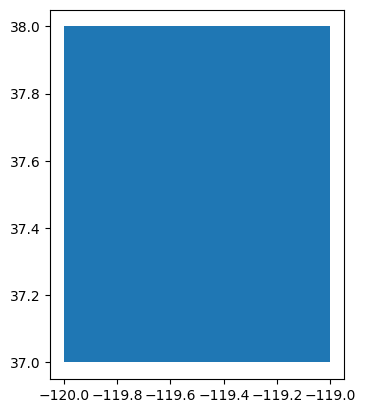

In [21]:
roi.plot(trixels=False)

In [22]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
mod = starepandas.io.granules.Mod05(fname)
mod.read_sidecar_index()

In [23]:
intersects = pystare.intersects(sids, mod.sids.flatten())
intersects = numpy.reshape(intersects, mod.sids.shape)
intersects

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## VNP02

In [24]:
vnp02_name = '../tests/data/granules/viirs/VNP02DNB.A2022308.1930.002.2022309051542.nc'
vnp02 = starepandas.read_granule(vnp02_name, sidecar=False, latlon=False)

vnp03_name = '../tests/data/granules/viirs/VNP03DNB.A2022308.1930.002.2022309041547.nc'
vnp03 = starepandas.read_granule(vnp03_name, sidecar=True, latlon=False)

In [25]:
vnp02 = vnp03.join(vnp02)

In [26]:
vnp02[(vnp02.land_water_mask==2) | (vnp02.land_water_mask==4) | (vnp02.land_water_mask==6) | (vnp02.land_water_mask==7)]

,sids,moon_illumination_fraction,land_water_mask,quality_flag,DNB_observations,DNB_quality_flags
72,3141596848628017166,85.949997,2,0,0.002691,0
73,3141596267891641230,85.949997,2,0,0.002290,0
78,3141596311239885294,85.949997,2,0,0.004192,0
682,3136255941480419886,85.939995,2,0,0.001281,0
683,3136257757938132206,85.939995,2,0,0.001304,0
...,...,...,...,...,...,...
13134834,3251432349700346061,85.709999,2,0,0.004365,0
13134836,3251432266683722606,85.709999,2,0,0.004577,0
13134839,3251396673547934318,85.709999,2,0,0.004433,0
13134845,3249540731532554573,85.709999,2,0,0.004744,0


In [27]:
del vnp02, vnp03
gc.collect()

105

## VNP CLDMSK

In [28]:
cldmsk_name = '../tests/data/granules/CLDMSK_L2_VIIRS_SNPP.A2020219.0742.001.2020219190616.nc'
cldmsk = starepandas.io.granules.CLDMSKL2VIIRS(cldmsk_name)

In [29]:
cldmsk.read_latlon()
cldmsk.read_data()
cldmsk.to_df()

,lat,lon,Integer_Cloud_Mask
0,41.747662,-104.969498,3
1,41.747696,-104.950218,3
2,41.747730,-104.930237,3
3,41.747761,-104.910843,3
4,41.747784,-104.891747,3
...,...,...,...
10342395,16.522247,-78.595093,2
10342396,16.518646,-78.580162,1
10342397,16.515034,-78.565208,0
10342398,16.511414,-78.550224,1


In [30]:
del cldmsk
gc.collect()

25

## Plotting

In [31]:
path = '../tests/data/granules/viirs/VNP03DNB.A2022308.1930.002.2022309041547.nc'
vnp03dnb = starepandas.io.granules.VNP03DNB(path)
vnp03dnb.read_latlon()

path = '../tests/data/granules/viirs/VNP03MOD.A2022308.1930.002.2022309041547.nc'
vnp03mod = starepandas.io.granules.VNP03MOD(path)
vnp03mod.read_latlon()

path = '../tests/data/granules/CLDMSK_L2_VIIRS_SNPP.A2020219.0742.001.2020219190616.nc'
cldmsk = starepandas.io.granules.CLDMSKL2VIIRS(path)
cldmsk.read_latlon()

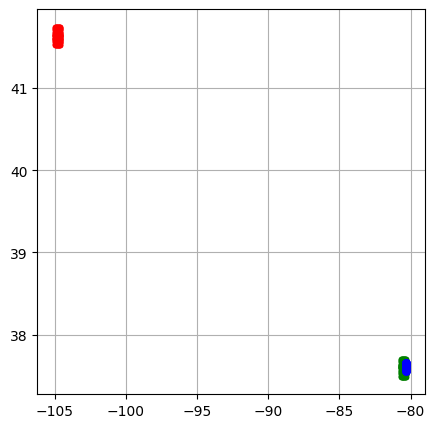

In [32]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

n = 20
ns = 0
nt = 0

ax.grid('on')

ax.plot(cldmsk.lon[ns:ns+n, nt:nt+n].flatten(), cldmsk.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='r', lw=0, marker='.')

ax.plot(vnp03mod.lon[ns:ns+n, nt:nt+n].flatten(), vnp03mod.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='g',lw=0, marker='.')

ax.plot(vnp03dnb.lon[ns:ns+n, nt:nt+n].flatten(), vnp03dnb.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='b',lw=0, marker='.')